In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Путь к папке с данными
data_path = r'D:\diplom_baza\aug_baza'

# Инициализация списков для данных и меток
X = []
y = []

# Целевое разрешение изображений
target_resolution = (256, 256)

# Словарь для хранения счетчика неправильных файлов для каждой папки
invalid_file_counts = {}

# Проход по всем классам в папке
for class_folder in os.listdir(data_path):
    class_path = os.path.join(data_path, class_folder)
    
    # Инициализация счетчика неправильных файлов для текущей папки
    invalid_file_count = 0
    
    # Проход по изображениям в каждом классе
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        
        # Загрузка изображения
        img = cv2.imread(image_path)
        
        # Проверка на успешность загрузки
        if img is not None:
            # Изменение размера изображения
            img = cv2.resize(img, target_resolution)
            
            # Преобразование изображения в массив и добавление в список X
            X.append(img)
            
            # Добавление метки класса в список y
            y.append(class_folder)
        else:
            # Увеличение счетчика неправильных файлов для текущей папки
            invalid_file_count += 1
    
    # Сохранение счетчика неправильных файлов для текущей папки в словаре
    invalid_file_counts[class_folder] = invalid_file_count

# Преобразование списков в массивы numpy
X = np.array(X)
y = np.array(y)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Разделение обучающего набора на обучающий и валидационный
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Инициализация и обучение label_encoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [6]:
# Проверка размерностей массивов
print("Размерности массивов:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_test.shape)
print("y_val:", y_test.shape)

Размерности массивов:
X_train: (28539, 256, 256, 3)
y_train: (28539,)
X_val: (7928, 256, 256, 3)
y_val: (7928,)


Epoch 1/20
892/892 [==============================] - 72s 76ms/step - loss: 3.1076 - accuracy: 0.2234 - val_loss: 2.5522 - val_accuracy: 0.3002
Epoch 2/20
892/892 [==============================] - 64s 72ms/step - loss: 2.0618 - accuracy: 0.3939 - val_loss: 2.0873 - val_accuracy: 0.4185
Epoch 3/20
892/892 [==============================] - 64s 71ms/step - loss: 1.5895 - accuracy: 0.5187 - val_loss: 1.6758 - val_accuracy: 0.5020
Epoch 4/20
892/892 [==============================] - 63s 71ms/step - loss: 1.2470 - accuracy: 0.6179 - val_loss: 1.5257 - val_accuracy: 0.5588
Epoch 5/20
892/892 [==============================] - 63s 71ms/step - loss: 0.9514 - accuracy: 0.7055 - val_loss: 1.4512 - val_accuracy: 0.6004
Epoch 6/20
892/892 [==============================] - 63s 71ms/step - loss: 0.7196 - accuracy: 0.7707 - val_loss: 1.7532 - val_accuracy: 0.5714
Epoch 7/20
892/892 [==============================] - 63s 71ms/step - loss: 0.5577 - accuracy: 0.8216 - val_loss: 1.3476 - val_accuracy:

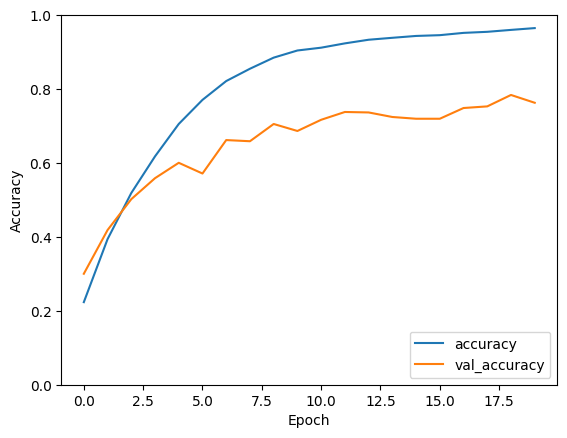

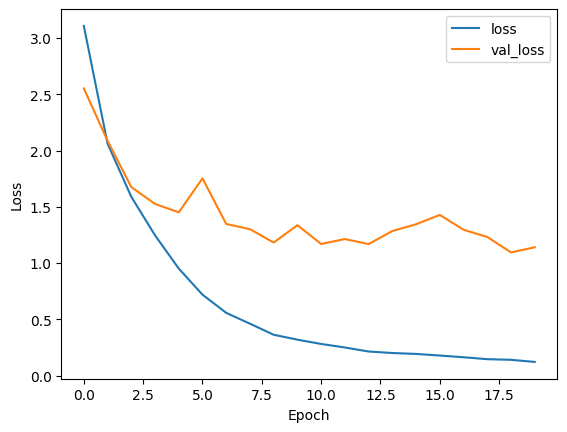

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Создание архитектуры модели
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Добавляем слой dropout для регуляризации
    layers.Dense(512, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train_encoded, epochs=20, validation_data=(X_val, y_val_encoded), verbose=1)

# Тестирование модели
test_loss, test_acc = model.evaluate(X_test, label_encoder.transform(y_test))
print("Test accuracy:", test_acc)

# Графики точности и потерь в процессе обучения
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Сохранение весов модели
model.save_weights('image_classifier_weights2.h5')


Epoch 1/20
149/149 [==============================] - 13s 83ms/step - loss: 5.8536 - accuracy: 0.0915 - val_loss: 3.3789 - val_accuracy: 0.1151
Epoch 2/20
149/149 [==============================] - 11s 73ms/step - loss: 3.0635 - accuracy: 0.2091 - val_loss: 3.2304 - val_accuracy: 0.2113
Epoch 3/20
149/149 [==============================] - 11s 73ms/step - loss: 2.5260 - accuracy: 0.3086 - val_loss: 3.1245 - val_accuracy: 0.2208
Epoch 4/20
149/149 [==============================] - 11s 72ms/step - loss: 2.0751 - accuracy: 0.4186 - val_loss: 3.5457 - val_accuracy: 0.2340
Epoch 5/20
149/149 [==============================] - 11s 72ms/step - loss: 1.5360 - accuracy: 0.5495 - val_loss: 3.0799 - val_accuracy: 0.2717
Epoch 6/20
149/149 [==============================] - 11s 73ms/step - loss: 1.1699 - accuracy: 0.6534 - val_loss: 3.2683 - val_accuracy: 0.2811
Epoch 7/20
149/149 [==============================] - 11s 73ms/step - loss: 0.7623 - accuracy: 0.7603 - val_loss: 3.6669 - val_accuracy:

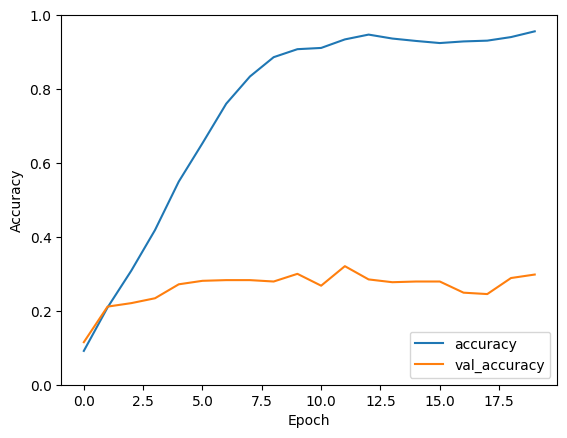

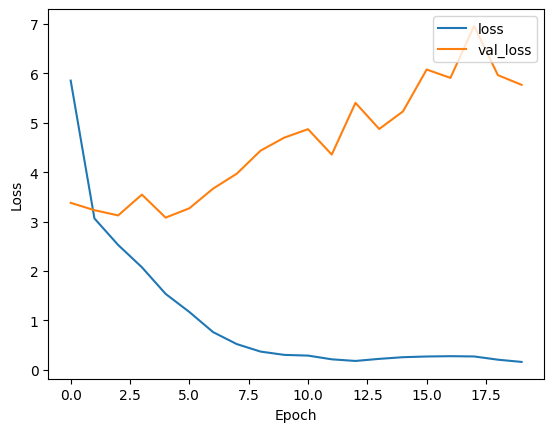

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Создание архитектуры модели
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Добавляем слой dropout для регуляризации
    layers.Dense(512, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train_encoded, epochs=20, validation_data=(X_val, y_val_encoded), verbose=1)

# Тестирование модели
test_loss, test_acc = model.evaluate(X_test, label_encoder.transform(y_test))
print("Test accuracy:", test_acc)

# Графики точности и потерь в процессе обучения
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Сохранение весов модели
model.save_weights('image_classifier_weights.h5')


In [2]:
import autokeras as ak
import pickle

clf = ak.ImageClassifier(
    max_trials=6,
    objective='val_accuracy',
    directory='berries3',
    overwrite=True)

# Обучение с использованием валидационного набора
clf.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_val, y_val_encoded), verbose=1)

# Сохранение label_encoder в файл
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

# Сохранение словаря invalid_file_counts в файл
with open('invalid_file_counts.pkl', 'wb') as ifc_file:
    pickle.dump(invalid_file_counts, ifc_file)

# Сохранение лучшей модели
best_model = clf.export_model()
best_model.save('best_autokeras_model')
best_model.save('best_model3.h5')

Trial 6 Complete [01h 03m 35s]
val_accuracy: 0.852830171585083

Best val_accuracy So Far: 0.8924528360366821
Total elapsed time: 04h 27m 23s
Epoch 1/10
Not enough memory, reduce batch size to 16.
Epoch 1/10
Not enough memory, reduce batch size to 8.
Epoch 1/10
596/596 [==============================] - 374s 627ms/step - loss: 3.5223 - accuracy: 0.1824 - val_loss: 2.9151 - val_accuracy: 0.4623
Epoch 2/10
596/596 [==============================] - 371s 622ms/step - loss: 2.1319 - accuracy: 0.5817 - val_loss: 1.5289 - val_accuracy: 0.7151
Epoch 3/10
596/596 [==============================] - 369s 620ms/step - loss: 1.0946 - accuracy: 0.7827 - val_loss: 0.9294 - val_accuracy: 0.8075
Epoch 4/10
596/596 [==============================] - 370s 621ms/step - loss: 0.6206 - accuracy: 0.8774 - val_loss: 0.6825 - val_accuracy: 0.8434
Epoch 5/10
596/596 [==============================] - 370s 621ms/step - loss: 0.3509 - accuracy: 0.9387 - val_loss: 0.5684 - val_accuracy: 0.8623
Epoch 6/10
596/596 [

INFO:tensorflow:Assets written to: berries3\image_classifier\best_model\assets


INFO:tensorflow:Assets written to: berries3\image_classifier\best_model\assets


INFO:tensorflow:Assets written to: best_autokeras_model\assets


INFO:tensorflow:Assets written to: best_autokeras_model\assets


In [6]:
import pickle
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import autokeras as ak

with open('label_encoder.pkl', 'rb') as le_file:
    label_encoder = pickle.load(le_file)

with open('invalid_file_counts.pkl', 'rb') as ifc_file:
    invalid_file_counts = pickle.load(ifc_file)

loaded_model = load_model('best_autokeras_model', custom_objects=ak.CUSTOM_OBJECTS)
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 256, 256, 3)      0         
 t32)                                                            
                                                                 
 random_translation (RandomT  (None, 256, 256, 3)      0         
 ranslation)                                                     
                                                                 
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 global_average_pooling2d (G  (None, 2560)             0     

In [6]:
# Преобразование строковых меток тестового набора в числовые
y_test_encoded = label_encoder.transform(y_test)

# Оценка производительности на тестовых данных
evaluation = clf.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", evaluation[1])


42/42 [==============================] - 22s 397ms/step - loss: 0.3211 - accuracy: 0.9139
Test Accuracy: 0.9138972759246826


In [1]:
import pickle
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import autokeras as ak

with open('91_version/label_encoder.pkl', 'rb') as le_file:
    label_encoder = pickle.load(le_file)

with open('91_version/invalid_file_counts.pkl', 'rb') as ifc_file:
    invalid_file_counts = pickle.load(ifc_file)

loaded_model = load_model('91_version/best_autokeras_model', custom_objects=ak.CUSTOM_OBJECTS)

# Пример загрузки нового изображения
new_image_path = 'ex/9.jpg'
new_img = cv2.imread(new_image_path)
new_img = cv2.resize(new_img, (256, 256))
new_img_array = np.expand_dims(new_img, axis=0)

# Получение предсказанных вероятностей
predictions = loaded_model.predict(new_img_array)

# Преобразование вероятностей в исходные метки
predicted_class = np.argmax(predictions)
decoded_class = label_encoder.inverse_transform([predicted_class])[0]

print(f"Предсказанный класс: {decoded_class}")

Using TensorFlow backend
1/1 [==============================] - 9s 9s/step
Предсказанный класс: paslen_chern


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, RandomTranslation, RandomFlip
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from efficientnet.tfkeras import EfficientNetB7

# Входные данные
input_shape = (256, 256, 3)
input_layer = Input(shape=input_shape, name='input_1')

# Слой приведения к float32
cast_to_float32_layer = tf.keras.layers.experimental.preprocessing.Rescaling(scale=1.0 / 255)(input_layer)

# Слой случайного смещения
random_translation_layer = RandomTranslation(height_factor=0.1, width_factor=0.1, fill_mode='reflect', seed=42)(cast_to_float32_layer)

# Слой случайного отражения
random_flip_layer = RandomFlip(mode='horizontal', seed=42)(random_translation_layer)

# Слой EfficientNetB7
efficientnetb7_layer = EfficientNetB7(weights='imagenet', include_top=False)(random_flip_layer)

# Глобальное среднее пулингирование
global_average_pooling_layer = GlobalAveragePooling2D()(efficientnetb7_layer)

# Полносвязный слой
dense_layer = Dense(units=46, activation='softmax')(global_average_pooling_layer)

# Создание модели
model = tf.keras.Model(inputs=input_layer, outputs=dense_layer, name='manual_model')

# Компиляция модели
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=[SparseCategoricalAccuracy()]
)

# Вывод информации о модели
model.summary()

# Обучение модели
model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_val, y_val_encoded), verbose=1)

# Сохранение модели
model.save('manual_model.h5')

# Сохранение label_encoder в файл
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

# Сохранение словаря invalid_file_counts в файл
with open('invalid_file_counts.pkl', 'wb') as ifc_file:
    pickle.dump(invalid_file_counts, ifc_file)


258434480/258434480 [==============================] - 23s 0us/step
Model: "manual_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 random_translation (RandomT  (None, 256, 256, 3)      0         
 ranslation)                                                     
                                                                 
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 efficientnet-b7 (Functional  (None, None, None, 2560)  64097680 
 )                                                               
                                                    

ResourceExhaustedError: Graph execution error:

Detected at node 'manual_model/efficientnet-b7/block2d_expand_activation/mul' defined at (most recent call last):
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\ipykernel\kernelbase.py", line 542, in dispatch_queue
      await self.process_one()
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\ipykernel\kernelbase.py", line 531, in process_one
      await dispatch(*args)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\ipykernel\kernelbase.py", line 775, in execute_request
      reply_content = await reply_content
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Sorra\AppData\Local\Temp\ipykernel_4216\1600148728.py", line 44, in <module>
      model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_val, y_val_encoded), verbose=1)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\keras\layers\core\activation.py", line 57, in call
      return self.activation(inputs)
    File "c:\Users\Sorra\anaconda3\envs\gpu\lib\site-packages\efficientnet\model.py", line 115, in swish
      return x * backend.sigmoid(x)
Node: 'manual_model/efficientnet-b7/block2d_expand_activation/mul'
failed to allocate memory
	 [[{{node manual_model/efficientnet-b7/block2d_expand_activation/mul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_64937]

In [2]:
import pickle
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import autokeras as ak

with open('91_version/label_encoder.pkl', 'rb') as le_file:
    label_encoder = pickle.load(le_file)

with open('91_version/invalid_file_counts.pkl', 'rb') as ifc_file:
    invalid_file_counts = pickle.load(ifc_file)

loaded_model = load_model('91_version/best_autokeras_model', custom_objects=ak.CUSTOM_OBJECTS)

# Пример загрузки нового изображения
new_image_path = 'ex/9.jpg'
new_img = cv2.imread(new_image_path)
new_img = cv2.resize(new_img, (256, 256))
new_img_array = np.expand_dims(new_img, axis=0)

# Получение предсказанных вероятностей
predictions = loaded_model.predict(new_img_array)

# Преобразование вероятностей в исходные метки
predicted_class = np.argmax(predictions)
decoded_class = label_encoder.inverse_transform([predicted_class])[0]

print(f"Предсказанный класс: {decoded_class}")

1/1 [==============================] - 4s 4s/step
Предсказанный класс: paslen_chern
